## The Objective

The objective is to minimize the customer's monetary loss using machine learning techniques. The customer is currently experiencing a $25.00 loss for each false positive prediction and a loss of $125.00 for false negative predictions. Our goal in this scenario is to generate a model that minimizes the cost of doing business and provide adequate justifications for the decisions made in the final model.

## The Dataset

The dataset features 160,000 records, 50 features, and a binary target variable. The dataset does not come with any metadata at all, so we must rely strictly on the interpretations of each feature and discover relationships between the features that help to meet the overall objective of minimizing costs for the customer.

## Methods

TBD

## Code

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split

random_state = 42

In [2]:
data = pd.read_csv('./final_project.csv')
pd.options.display.max_columns = 100
data.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
0,-0.166563,-3.961588,4.621113,2.481908,-1.800135,0.804684,6.718751,-14.789997,-1.040673,-4.204950,6.187465,13.251523,25.665413,-5.017267,10.503714,-2.517678,2.117910,5.865923,-6.666158,1.791497,-1.909114,-1.737940,-2.516715,3.553013,euorpe,-0.801340,1.142950,1.005131,-18.473784,July,tuesday,-3.851669,0.0%,-1.940031,-5.492063,0.627121,-0.873824,$1313.96,-1.353729,-5.186148,-10.612200,-1.497117,5.414063,-2.325655,1.674827,-0.264332,60.781427,-7.689696,0.151589,-8.040166,0
1,-0.149894,-0.585676,27.839856,4.152333,6.426802,-2.426943,40.477058,-6.725709,0.896421,0.330165,-11.708859,-2.352809,-25.014934,9.799608,-10.960705,1.504000,-2.397836,-9.301839,-1.999413,5.045258,-5.809984,10.814319,-0.478112,10.590601,asia,0.818792,-0.642987,0.751086,3.749377,Aug,wednesday,1.391594,-0.02%,2.211462,-4.460591,1.035461,0.228270,$1962.78,32.816804,-5.150012,2.147427,36.292790,4.490915,0.762561,6.526662,1.007927,15.805696,-4.896678,-0.320283,16.719974,0
2,-0.321707,-1.429819,12.251561,6.586874,-5.304647,-11.311090,17.812850,11.060572,5.325880,-2.632984,1.572647,-4.170771,12.078602,-5.158498,7.302780,-2.192431,-4.065428,-7.675055,4.041629,-6.633628,1.700321,-2.419221,2.467521,-5.270615,asia,-0.718315,-0.566757,4.171088,11.522448,July,wednesday,-3.262082,-0.01%,0.419607,-3.804056,-0.763357,-1.612561,$430.47,-0.333199,8.728585,-0.863137,-0.368491,9.088864,-0.689886,-2.731118,0.754200,30.856417,-7.428573,-2.090804,-7.869421,0
3,-0.245594,5.076677,-24.149632,3.637307,6.505811,2.290224,-35.111751,-18.913592,-0.337041,-5.568076,-2.000255,-19.286668,10.995330,-5.914378,2.511400,1.292362,-2.496882,-15.722954,-2.735382,1.117536,1.923670,-14.179167,1.470625,-11.484431,asia,-0.052430,-0.558582,9.215569,30.595226,July,wednesday,-2.285241,0.01%,-3.442715,4.420160,1.164532,3.033455,$-2366.29,14.188669,-6.385060,12.084421,15.691546,-7.467775,2.940789,-6.424112,0.419776,-72.424569,5.361375,1.806070,-7.670847,0
4,-0.273366,0.306326,-11.352593,1.676758,2.928441,-0.616824,-16.505817,27.532281,1.199715,-4.309105,6.667530,1.965913,-28.106348,-1.258950,5.759941,0.472584,-1.150097,-14.118709,4.527964,-1.284372,-9.026317,-7.039818,-1.978748,-15.998166,asia,-0.223449,0.350781,1.811182,-4.094084,July,tuesday,0.921047,0.01%,-0.431640,12.165494,-0.167726,-0.341604,$-620.66,-12.578926,1.133798,30.004727,-13.911297,-5.229937,1.783928,3.957801,-0.096988,-14.085435,-0.208351,-0.894942,15.724742,1


In [3]:
y = data['y']
X = data.drop(['y'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state, stratify=y)
print('X_train: ', X_train.shape,
      '\ny_train: ', y_train.shape,
      '\nX_test: ', X_test.shape,
      '\ny_test: ', y_test.shape)

X_train:  (128000, 50) 
y_train:  (128000,) 
X_test:  (32000, 50) 
y_test:  (32000,)


In [4]:
pd.options.display.max_columns = 49
X_train.describe()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x25,x26,x27,x28,x31,x33,x34,x35,x36,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
count,127982.000000,127981.000000,127972.000000,127970.000000,127983.000000,127969.000000,127979.000000,127975.000000,127981.000000,127974.000000,127967.000000,127977.000000,127969.000000,127974.000000,127971.000000,127971.000000,127981.000000,127981.000000,127965.000000,127976.000000,127966.000000,127979.000000,127979.000000,127962.000000,127981.000000,127972.000000,127974.000000,127971.000000,127966.000000,127965.000000,127964.000000,127975.000000,127979.000000,127974.000000,127984.000000,127975.000000,127968.000000,127980.000000,127971.000000,127968.000000,127979.000000,127976.000000,127972.000000,127971.000000,127973.000000
mean,-0.000233,0.015927,-1.137009,-0.030134,-0.005189,0.017988,-1.650412,-7.632300,-0.036771,0.013169,-0.007028,0.043571,-1.361120,-0.003994,0.004928,0.003146,0.012860,0.004160,0.011085,0.014097,0.300376,-0.033319,0.002857,0.695381,0.000362,-0.000961,-0.002395,0.046416,-0.004077,-0.008300,-0.022149,0.002898,0.009208,6.054555,-0.000342,-2.280161,6.696548,-1.823620,-0.004985,-0.007610,0.000887,-12.757091,0.021462,0.000821,-0.664870
std,0.371378,6.338409,13.287193,8.067211,6.381621,7.673899,19.318144,30.583165,8.898180,6.347198,7.862782,8.753134,14.761724,8.966138,6.968978,3.273652,4.991585,7.574782,4.543655,7.595952,5.810222,9.415564,5.413376,14.926783,1.264435,0.843224,6.785012,14.444672,2.764173,1.747983,7.998362,2.378660,1.592850,16.907176,5.137255,17.047011,18.697780,5.106297,1.534255,4.157975,0.396842,36.606157,4.794483,1.936761,15.055081
min,-1.592635,-26.053979,-59.394048,-33.864827,-28.467536,-33.822988,-86.354483,-181.506976,-37.691045,-27.980659,-32.406143,-38.092869,-64.197967,-36.205707,-30.905214,-17.002359,-26.042983,-34.395898,-18.790240,-35.633396,-26.677396,-43.501854,-23.644193,-66.640341,-6.364653,-3.579942,-32.003555,-72.896705,-11.522680,-7.451454,-36.116606,-10.008149,-6.866024,-74.297559,-21.546121,-74.059196,-82.167224,-27.933750,-6.876234,-17.983487,-1.753221,-201.826828,-21.086333,-8.490155,-65.791191
25%,-0.250854,-4.239255,-10.166609,-5.459399,-4.315710,-5.153559,-14.779614,-27.238063,-6.036748,-4.248533,-5.288786,-5.878927,-11.423294,-6.058566,-4.704963,-2.207927,-3.351293,-5.084074,-3.058312,-5.118960,-3.604621,-6.363411,-3.660905,-9.297103,-0.852807,-0.567494,-4.610687,-9.696978,-1.870064,-1.186372,-5.399320,-1.606003,-1.066574,-5.249811,-3.467030,-13.918753,-5.804080,-5.147121,-1.041030,-2.808371,-0.266998,-36.444478,-3.232455,-1.322622,-10.937141
50%,-0.001322,0.028105,-1.312739,-0.031448,0.009683,0.028314,-1.905278,-6.873548,-0.014964,0.004454,-0.017794,0.017593,-1.639466,-0.029857,0.007667,0.002809,0.022793,0.018270,0.013792,0.032114,0.437904,-0.031935,0.006585,0.999126,-0.003847,-0.001503,0.040501,0.301256,0.006209,-0.009951,-0.048736,-0.000851,0.006449,6.170430,0.016133,-2.672047,6.824208,-1.917862,-0.007160,-0.010351,0.001770,-12.977831,0.021841,-0.012518,-0.572639
75%,0.249459,4.291164,7.865764,5.429540,4.298284,5.196676,11.439981,12.284980,5.957489,4.302156,5.325556,5.943024,8.348216,6.056498,4.708432,2.216437,3.387163,5.101323,3.064848,5.161735,4.304639,6.319764,3.671386,11.022432,0.851989,0.566713,4.662835,9.943534,1.865525,1.180000,5.385217,1.603362,1.080623,17.427168,3.456862,9.000087,19.273821,1.465863,1.029794,2.777005,0.268573,11.484705,3.266336,1.319282,9.679463
max,1.600849,27.988178,57.908998,38.906025,26.247812,35.550110,84.195332,149.150634,39.049831,27.377842,33.732769,36.360443,73.279354,42.392177,32.546340,13.782559,21.961123,37.057048,19.652986,31.410343,27.814560,46.237503,24.863012,58.490500,5.314169,3.732341,28.645074,64.163062,12.279356,7.787120,34.841428,9.892426,6.999544,90.467981,21.082605,88.824477,100.050432,22.668041,6.441093,17.007392,1.669205,150.859415,20.836854,8.206509,66.877604


In [5]:
import numpy as np
kwargs = dict(delimiter=",",
              skip_header=1,
              dtype='float64'
             )
df = np.genfromtxt('./final_project.csv',**kwargs)
X2 = df[:,:-1]
y2 = df[:,-1]

### Below, we used the Anderson Darling Test to determine if features are normally distributed or not. This is useful for our imputation strategy. Where the critical value is exceeded by the test statistic under the assumption of normality, we reject the null hypothesis and conclude violaiton. Therefore, for these, we apply a median imputation because while the distributions appear normal visually, there are outliers influencing normality at a 95% confidence level.

### Also, we identify columns that are unable to be tested for having insufficient values required for the test.

Column 2 is not normally distributed at a 95% level of confidence. Statistic: 10.220688929781318 and Critical Value: 0.787


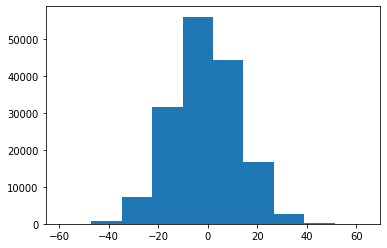

Column 6 is not normally distributed at a 95% level of confidence. Statistic: 10.270658839464886 and Critical Value: 0.787


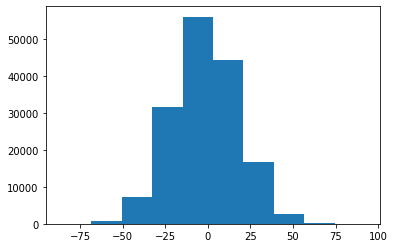

Column 7 is not normally distributed at a 95% level of confidence. Statistic: 58.931357158726314 and Critical Value: 0.787


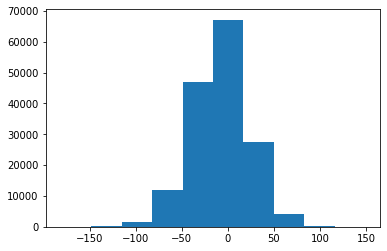

Column 12 is not normally distributed at a 95% level of confidence. Statistic: 26.41666220035404 and Critical Value: 0.787


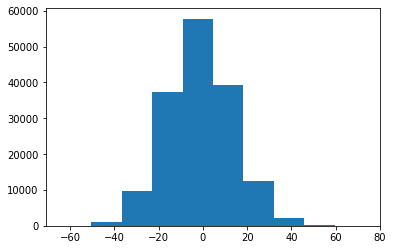

Column 20 is not normally distributed at a 95% level of confidence. Statistic: 29.789376930275466 and Critical Value: 0.787


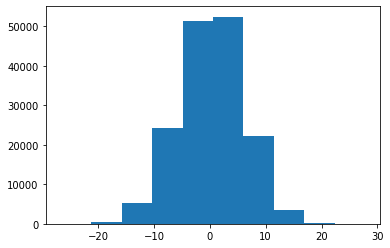

Column 23 is not normally distributed at a 95% level of confidence. Statistic: 29.42702754313359 and Critical Value: 0.787


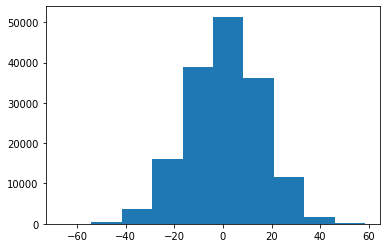

Column 27 is not normally distributed at a 95% level of confidence. Statistic: 5.4526740521832835 and Critical Value: 0.787


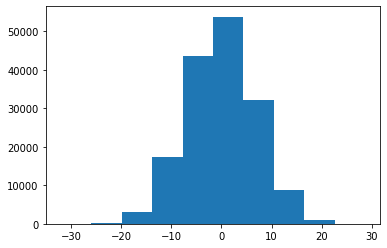

Column 28 is not normally distributed at a 95% level of confidence. Statistic: 13.03100506181363 and Critical Value: 0.787


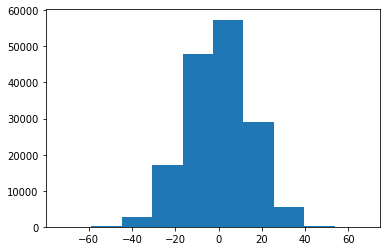

Column 38 is not normally distributed at a 95% level of confidence. Statistic: 3.5536952081602067 and Critical Value: 0.787


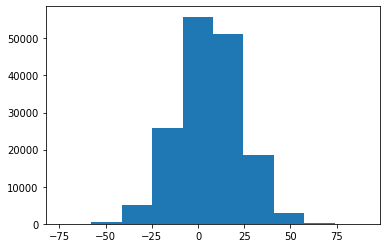

Column 40 is not normally distributed at a 95% level of confidence. Statistic: 26.42135159339523 and Critical Value: 0.787


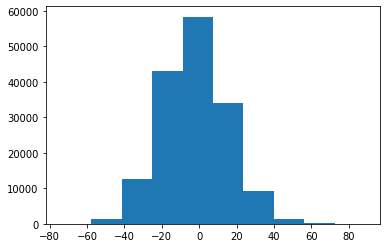

Column 41 is not normally distributed at a 95% level of confidence. Statistic: 3.595784921606537 and Critical Value: 0.787


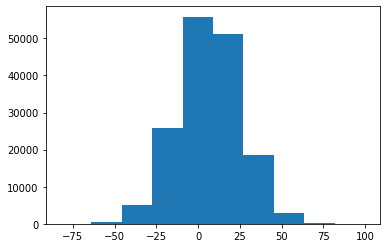

Column 42 is not normally distributed at a 95% level of confidence. Statistic: 47.59360718273092 and Critical Value: 0.787


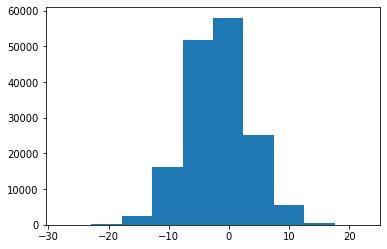

Column 46 is not normally distributed at a 95% level of confidence. Statistic: 31.06127203576034 and Critical Value: 0.787


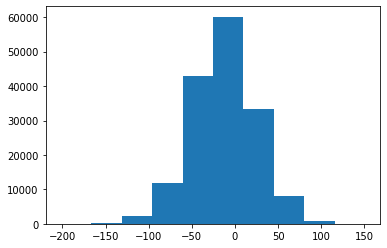

Column 48 is not normally distributed at a 95% level of confidence. Statistic: 2.897343336167978 and Critical Value: 0.787


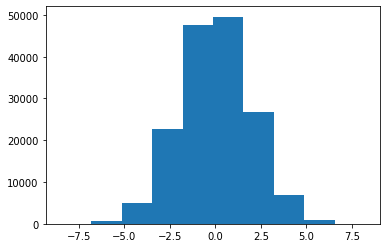

Column 49 is not normally distributed at a 95% level of confidence. Statistic: 6.4221460196131375 and Critical Value: 0.787


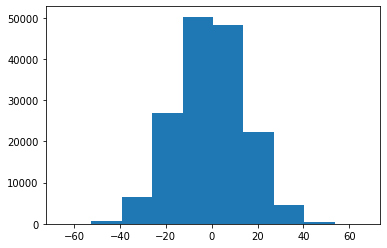

Columns that are not numeric: [24, 29, 30, 32, 37]


In [6]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.anderson.html
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

non_parametric=[]
bad_cols=[]

for i in np.arange(0,np.shape(X2)[1]):
    try:
        statistic = stats.anderson(X2[~np.isnan(X2[:,i]),i], dist='norm').statistic
        crit_val = stats.anderson(X2[~np.isnan(X2[:,i]),i], dist='norm').critical_values[2] # 5% significance, 95% confidence)

        if (crit_val < statistic):
            print("Column {} is not normally distributed at a 95% level of confidence. Statistic: {} and Critical Value: {}".format(i, statistic, crit_val));
            non_parametric.append(i)
            plt.hist(X2[~np.isnan(X2[:,i]),i])
            plt.show()
    except:
        bad_cols.append(i)
print("Columns that are not numeric: {}".format(bad_cols))

### The columns that are not normally distributed to not appear to be in wild violation of normality. Therefore, we can assume the SimpleImputer would work reasonable well using the mean.

Drop the non-numeric columns:

In [7]:
X_numeric = np.delete(X2, bad_cols, axis=1)

In [8]:
np.shape(X_numeric)

(160000, 45)

In [9]:
for i in np.arange(np.shape(X_numeric)[1]):
    print("Percent of column {} having missing values: {}%".format(i,round(100*(np.count_nonzero(np.isnan(X_numeric[:,i]))/np.shape(X_numeric[:,i])[0]),2)))

Percent of column 0 having missing values: 0.02%
Percent of column 1 having missing values: 0.02%
Percent of column 2 having missing values: 0.02%
Percent of column 3 having missing values: 0.02%
Percent of column 4 having missing values: 0.02%
Percent of column 5 having missing values: 0.02%
Percent of column 6 having missing values: 0.02%
Percent of column 7 having missing values: 0.02%
Percent of column 8 having missing values: 0.01%
Percent of column 9 having missing values: 0.02%
Percent of column 10 having missing values: 0.03%
Percent of column 11 having missing values: 0.02%
Percent of column 12 having missing values: 0.02%
Percent of column 13 having missing values: 0.02%
Percent of column 14 having missing values: 0.02%
Percent of column 15 having missing values: 0.02%
Percent of column 16 having missing values: 0.02%
Percent of column 17 having missing values: 0.02%
Percent of column 18 having missing values: 0.03%
Percent of column 19 having missing values: 0.02%
Percent of

In [10]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(X_numeric)
X_numeric = imp.transform(X_numeric)

### Check to confirm numeric imputation was successful:

In [11]:
for i in np.arange(np.shape(X_numeric)[1]):
    print("Percent of column {} having missing values: {}%".format(i,round(100*(np.count_nonzero(np.isnan(X_numeric[:,i]))/np.shape(X_numeric[:,i])[0]),2)))

Percent of column 0 having missing values: 0.0%
Percent of column 1 having missing values: 0.0%
Percent of column 2 having missing values: 0.0%
Percent of column 3 having missing values: 0.0%
Percent of column 4 having missing values: 0.0%
Percent of column 5 having missing values: 0.0%
Percent of column 6 having missing values: 0.0%
Percent of column 7 having missing values: 0.0%
Percent of column 8 having missing values: 0.0%
Percent of column 9 having missing values: 0.0%
Percent of column 10 having missing values: 0.0%
Percent of column 11 having missing values: 0.0%
Percent of column 12 having missing values: 0.0%
Percent of column 13 having missing values: 0.0%
Percent of column 14 having missing values: 0.0%
Percent of column 15 having missing values: 0.0%
Percent of column 16 having missing values: 0.0%
Percent of column 17 having missing values: 0.0%
Percent of column 18 having missing values: 0.0%
Percent of column 19 having missing values: 0.0%
Percent of column 20 having mi

Read the non-numeric columns only:

In [12]:
kwargs = dict(delimiter=",",
              skip_header=1,
              dtype="|U5",
              usecols=bad_cols,
              autostrip=True
             )
df_cat = np.genfromtxt('./final_project.csv',**kwargs)

Some of the non-numeric columns are numeric with special characters that need to be dropped while others are names of continents, months, and days, which can be encoded:

In [13]:
df_cat

array([['euorp', 'July', 'tuesd', '0.0%', '$1313'],
       ['asia', 'Aug', 'wedne', '-0.02', '$1962'],
       ['asia', 'July', 'wedne', '-0.01', '$430.'],
       ...,
       ['asia', 'Jun', 'wedne', '-0.0%', '$687.'],
       ['asia', 'May', 'wedne', '-0.02', '$439.'],
       ['asia', 'Aug', 'tuesd', '0.02%', '$-122']], dtype='<U5')

In [14]:
continents = df_cat[:,0]
months = df_cat[:,1]
days = df_cat[:,2]

# convert sept. to Sept to be consistent with the other months and remove the period character
months[months=='sept.']='Sept'

Check to see the percent of missing values in categorical data to assess risk of imputation. The missing volume is very small less than 0.02% so highly likely to be insignificant. After inspection, the missing values appear to be completely at random as well so the risk of any imputation is most likely non-impactful.

In [15]:
print("Percent of days with missing values: {}%".format(round(100*np.count_nonzero(continents=='')/np.shape(continents)[0],2)))
print("Percent of days with missing values: {}%".format(round(100*np.count_nonzero(months=='')/np.shape(months)[0],2)))
print("Percent of days with missing values: {}%".format(round(100*np.count_nonzero(days=='')/np.shape(days)[0],2)))

Percent of days with missing values: 0.02%
Percent of days with missing values: 0.02%
Percent of days with missing values: 0.02%


There are also very few missing values in the dollars and percents columns as well. Imputation here - along with all the other features - will also be minimal.

In [16]:
df_cat[185,4]

''

Set a placeholder of 4444 in place of the missing values so we can convert the array to float, then convert 4444 back to nan:

In [17]:
# To convert the dollar and percent columns to float, we need to strip special characters and convert to float.
# If it fails to convert to float, we set the value to 4444 because this is happening for instances that have no value.
# We then convert all 4444 values to np.nan and join the values back to the numeric data. We then encode true categorical data.
for i in np.arange(0,len(df_cat)):
    try:
        df_cat[i,3] = float(df_cat[i,3].replace('%', ''))
        df_cat[i,4] = float(df_cat[i,4].replace('$', ''))
    except:
        #pass
        df_cat[i,3] = 4444 #4444 is not a real percent value used so will be the placeholder for nan conversion; +/-0.05% is the max
        df_cat[i,4] = 4444 #4444 is not a real dollar value used so will be the placeholder for nan conversion; $999 is the max

percents = df_cat[:,3].astype(np.float)
percents[percents==4444] = 'nan'
dollars = df_cat[:,4].astype(np.float)
dollars[dollars==4444] = 'nan'

cat_to_num = np.hstack((percents.reshape(160000,1),dollars.reshape(160000,1)))

In [18]:
for i in np.arange(np.shape(cat_to_num)[1]):
    print("Percent of column {} having missing values: {}%".format(i,round(100*(np.count_nonzero(np.isnan(cat_to_num[:,i]))/np.shape(cat_to_num[:,i])[0]),2)))

Percent of column 0 having missing values: 0.03%
Percent of column 1 having missing values: 0.03%


# Now combine all numeric data, run an imputer on it and use those values to predict the missing values of the numeric data converted from cats (dollars and percents)

All features that are truly numeric are horizontally stacked together here:

In [19]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(cat_to_num)
cat_to_num = imp.transform(cat_to_num)

### Check to confirm dollar and percent imputations were successful:

In [20]:
for i in np.arange(np.shape(cat_to_num)[1]):
    print("Percent of column {} having missing values: {}%".format(i,round(100*(np.count_nonzero(np.isnan(cat_to_num[:,i]))/np.shape(cat_to_num[:,i])[0]),2)))

Percent of column 0 having missing values: 0.0%
Percent of column 1 having missing values: 0.0%


### Add the dollars and percents 2d array into the original numeric 2d array:

In [21]:
X_nums = np.hstack((X_numeric, cat_to_num))

Confirm no missing values:

In [22]:
for i in np.arange(np.shape(X_nums)[1]):
    print("Percent of column {} having missing values: {}%".format(i,round(100*(np.count_nonzero(np.isnan(X_nums[:,i]))/np.shape(X_nums[:,i])[0]),2)))

Percent of column 0 having missing values: 0.0%
Percent of column 1 having missing values: 0.0%
Percent of column 2 having missing values: 0.0%
Percent of column 3 having missing values: 0.0%
Percent of column 4 having missing values: 0.0%
Percent of column 5 having missing values: 0.0%
Percent of column 6 having missing values: 0.0%
Percent of column 7 having missing values: 0.0%
Percent of column 8 having missing values: 0.0%
Percent of column 9 having missing values: 0.0%
Percent of column 10 having missing values: 0.0%
Percent of column 11 having missing values: 0.0%
Percent of column 12 having missing values: 0.0%
Percent of column 13 having missing values: 0.0%
Percent of column 14 having missing values: 0.0%
Percent of column 15 having missing values: 0.0%
Percent of column 16 having missing values: 0.0%
Percent of column 17 having missing values: 0.0%
Percent of column 18 having missing values: 0.0%
Percent of column 19 having missing values: 0.0%
Percent of column 20 having mi

In [23]:
# For mapping X_train and X_test values to the missing and non-missing categorical targets for imputing
cont_to_impute = list(np.where(continents==''))
months_to_impute = list(np.where(months==''))
days_to_impute = list(np.where(days==''))

In [ ]:
# y_train_continents = np.delete(continents, cont_to_impute, axis=0)
# y_train_months = np.delete(months, months_to_impute, axis=0)
# y_train_days = np.delete(days, days_to_impute, axis=0)

# y_test_continents = continents[cont_to_impute]
# y_test_months = months[months_to_impute]
# y_test_days = days[days_to_impute]

In [588]:
# y_train_continents = continents[continents!='']
# y_train_months = months[months!='']
# y_train_days = days[days!='']

# y_test_continents = continents[continents=='']
# y_test_months = months[months=='']
# y_test_days = days[days=='']

# Encoding categorical data to numeric using dictionaries

In [24]:
import string
from collections import Counter

continent_dict = Counter()
month_dict = Counter()
day_dict = Counter()

for continent in np.delete(continents, cont_to_impute, axis=0):
    continent_dict[continent]+=1

for month in np.delete(months, months_to_impute, axis=0):
    month_dict[month]+=1

for day in np.delete(days, days_to_impute, axis=0):
    day_dict[day]+=1

continent_map = dict(enumerate(continent_dict.keys(),1))
month_map = dict(enumerate(month_dict.keys(),1))
day_map = dict(enumerate(day_dict.keys(),1))

reverse_continent_map = dict([(value, key) for (key, value) in continent_map.items()])
reverse_month_map = dict([(value, key) for (key, value) in month_map.items()])
reverse_day_map = dict([(value, key) for (key, value) in day_map.items()])

# encoded_continents = np.vectorize(reverse_continent_map.get)(y_train_continents)
# encoded_months = np.vectorize(reverse_month_map.get)(y_train_months)
# encoded_days = np.vectorize(reverse_day_map.get)(y_train_days)

# y_train_cont_final = encoded_continents
# y_train_month_final = encoded_months
# y_train_day_final = encoded_days

In [25]:
continents[continents!=''] = np.vectorize(reverse_continent_map.get)(continents[continents!=''])
months[months!=''] = np.vectorize(reverse_month_map.get)(months[months!=''])
days[days!=''] = np.vectorize(reverse_day_map.get)(days[days!=''])

In [26]:
X_train_continents = np.delete(X_nums, cont_to_impute, axis=0)
X_train_months = np.delete(X_nums, months_to_impute, axis=0)
X_train_days = np.delete(X_nums, days_to_impute, axis=0)

# X_test_continents = X_nums[cont_to_impute,:]
# X_test_months = X_nums[months_to_impute,:]
# X_test_days = X_nums[days_to_impute,:]

X_test_continents = X_nums[cont_to_impute]
X_test_months = X_nums[months_to_impute]
X_test_days = X_nums[days_to_impute]

In [27]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)

## Imputing Continents

In [28]:
neigh.fit(X_train_continents, continents[continents!=''])
continents[continents==''] = neigh.predict(X_test_continents)

In [29]:
continents[continents=='']

array([], dtype='<U5')

In [30]:
continents = continents.astype('float64')

In [31]:
continents

array([1., 2., 2., ..., 2., 2., 2.])

## Imputing Months

In [32]:
neigh.fit(X_train_months, months[months!=''])
months[months==''] = neigh.predict(X_test_months)

In [33]:
months[months=='']

array([], dtype='<U5')

In [34]:
months = months.astype('float64')

In [35]:
months

array([1., 2., 1., ..., 3., 4., 2.])

## Imputing Days

In [36]:
neigh.fit(X_train_days, days[days!=''])
days[days==''] = neigh.predict(X_test_days)

In [37]:
days[days=='']

array([], dtype='<U5')

In [38]:
days = days.astype('float64')

In [39]:
days

array([1., 2., 2., ..., 2., 2., 1.])

## Add the categorical-encoded data to the numeric data

In [41]:
X_new = np.hstack((X_nums, continents.reshape(160000,1), months.reshape(160000,1), days.reshape(160000,1)))

In [42]:
np.shape(X_new)

(160000, 50)

In [43]:
np.shape(y)

(160000,)

In [44]:
y[np.isnan(y)]

Series([], Name: y, dtype: int64)

In [45]:
np.unique(y)

array([0, 1])